In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scipy import stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('Dataset/CO2 Emissions_Canada.csv')

In [5]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Rename Columns

In [6]:
newName_columns = {
    'Make' : 'Make',
    'Model': 'Model',
    'Vehicle Class': 'Vehicle_Class',
    'Engine Size(L)': 'Engine_Size(L)',
    'Cylinders': 'Cylinders',
    'Transmission': 'Transmission',
    'Fuel Type': 'Fuel_Type',
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City(L/100 km)',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy(L/100 km)',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb(L/100 km)',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb(mpg)',
    'CO2 Emissions(g/km)': 'CO2_Emissions(g/km)'
}

df.rename(columns=newName_columns, inplace=True)

#### Check Missing Value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Make                             7385 non-null   object 
 1   Model                            7385 non-null   object 
 2   Vehicle_Class                    7385 non-null   object 
 3   Engine_Size(L)                   7385 non-null   float64
 4   Cylinders                        7385 non-null   int64  
 5   Transmission                     7385 non-null   object 
 6   Fuel_Type                        7385 non-null   object 
 7   Fuel_Consumption_City(L/100 km)  7385 non-null   float64
 8   Fuel_Consumption_Hwy(L/100 km)   7385 non-null   float64
 9   Fuel_Consumption_Comb(L/100 km)  7385 non-null   float64
 10  Fuel_Consumption_Comb(mpg)       7385 non-null   int64  
 11  CO2_Emissions(g/km)              7385 non-null   int64  
dtypes: float64(4), int64

In [8]:
df.isnull()

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City(L/100 km),Fuel_Consumption_Hwy(L/100 km),Fuel_Consumption_Comb(L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions(g/km)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,False,False,False,False,False,False,False,False,False,False,False,False
7381,False,False,False,False,False,False,False,False,False,False,False,False
7382,False,False,False,False,False,False,False,False,False,False,False,False
7383,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.dtypes

Make                                object
Model                               object
Vehicle_Class                       object
Engine_Size(L)                     float64
Cylinders                            int64
Transmission                        object
Fuel_Type                           object
Fuel_Consumption_City(L/100 km)    float64
Fuel_Consumption_Hwy(L/100 km)     float64
Fuel_Consumption_Comb(L/100 km)    float64
Fuel_Consumption_Comb(mpg)           int64
CO2_Emissions(g/km)                  int64
dtype: object

In [10]:
df.describe()

,Engine_Size(L),Cylinders,Fuel_Consumption_City(L/100 km),Fuel_Consumption_Hwy(L/100 km),Fuel_Consumption_Comb(L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


#### Duplicate Rows

In [11]:
# Check Unique Values in dataset
df.nunique()

Make                                 42
Model                              2053
Vehicle_Class                        16
Engine_Size(L)                       51
Cylinders                             8
Transmission                         27
Fuel_Type                             5
Fuel_Consumption_City(L/100 km)     211
Fuel_Consumption_Hwy(L/100 km)      143
Fuel_Consumption_Comb(L/100 km)     181
Fuel_Consumption_Comb(mpg)           54
CO2_Emissions(g/km)                 331
dtype: int64

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7380    False
7381    False
7382    False
7383    False
7384    False
Length: 7385, dtype: bool

In [13]:
df.duplicated().sum()

1103

In [14]:
# Remove Duplicated Data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
# Describe summary data to numerical data type
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Engine_Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel_Consumption_City(L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel_Consumption_Hwy(L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel_Consumption_Comb(L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel_Consumption_Comb(mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2_Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


## Data Visualization

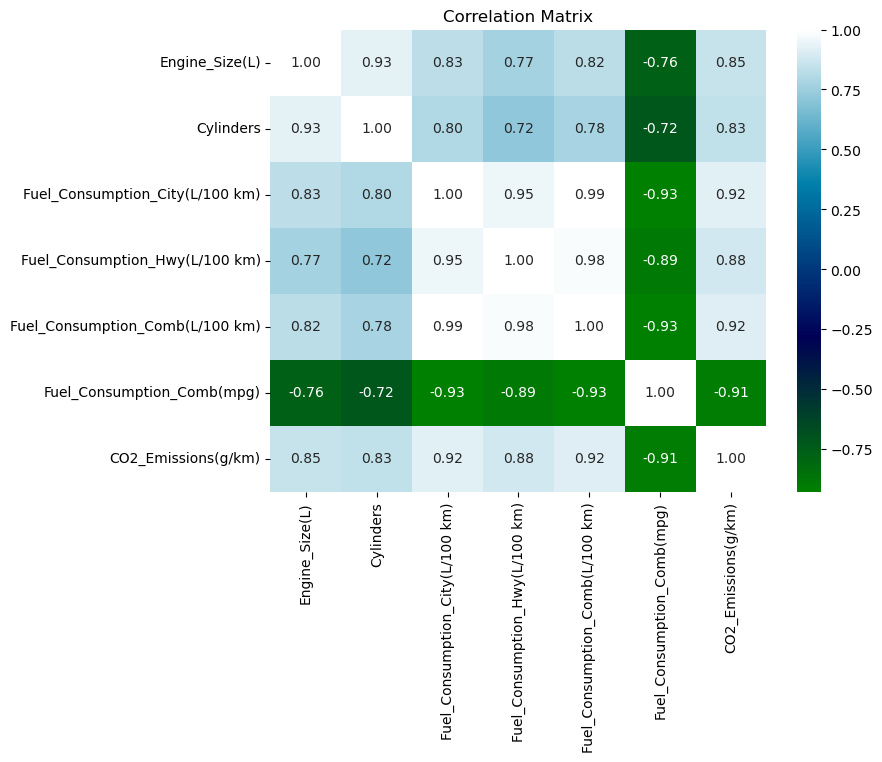

CO2_Emissions(g/km)                1.000000
Fuel_Consumption_City(L/100 km)    0.918756
Fuel_Consumption_Comb(L/100 km)    0.916840
Fuel_Consumption_Comb(mpg)         0.906783
Fuel_Consumption_Hwy(L/100 km)     0.883424
Engine_Size(L)                     0.854802
Cylinders                          0.834687
Name: CO2_Emissions(g/km), dtype: float64


In [16]:
# Correlation Analysis using only numeric values
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='ocean')
plt.title('Correlation Matrix')
plt.show()


correlation = df_numeric.corr()['CO2_Emissions(g/km)'].abs().sort_values(ascending=False)
print(correlation)

## EDA (Exploratory Data Analysis)

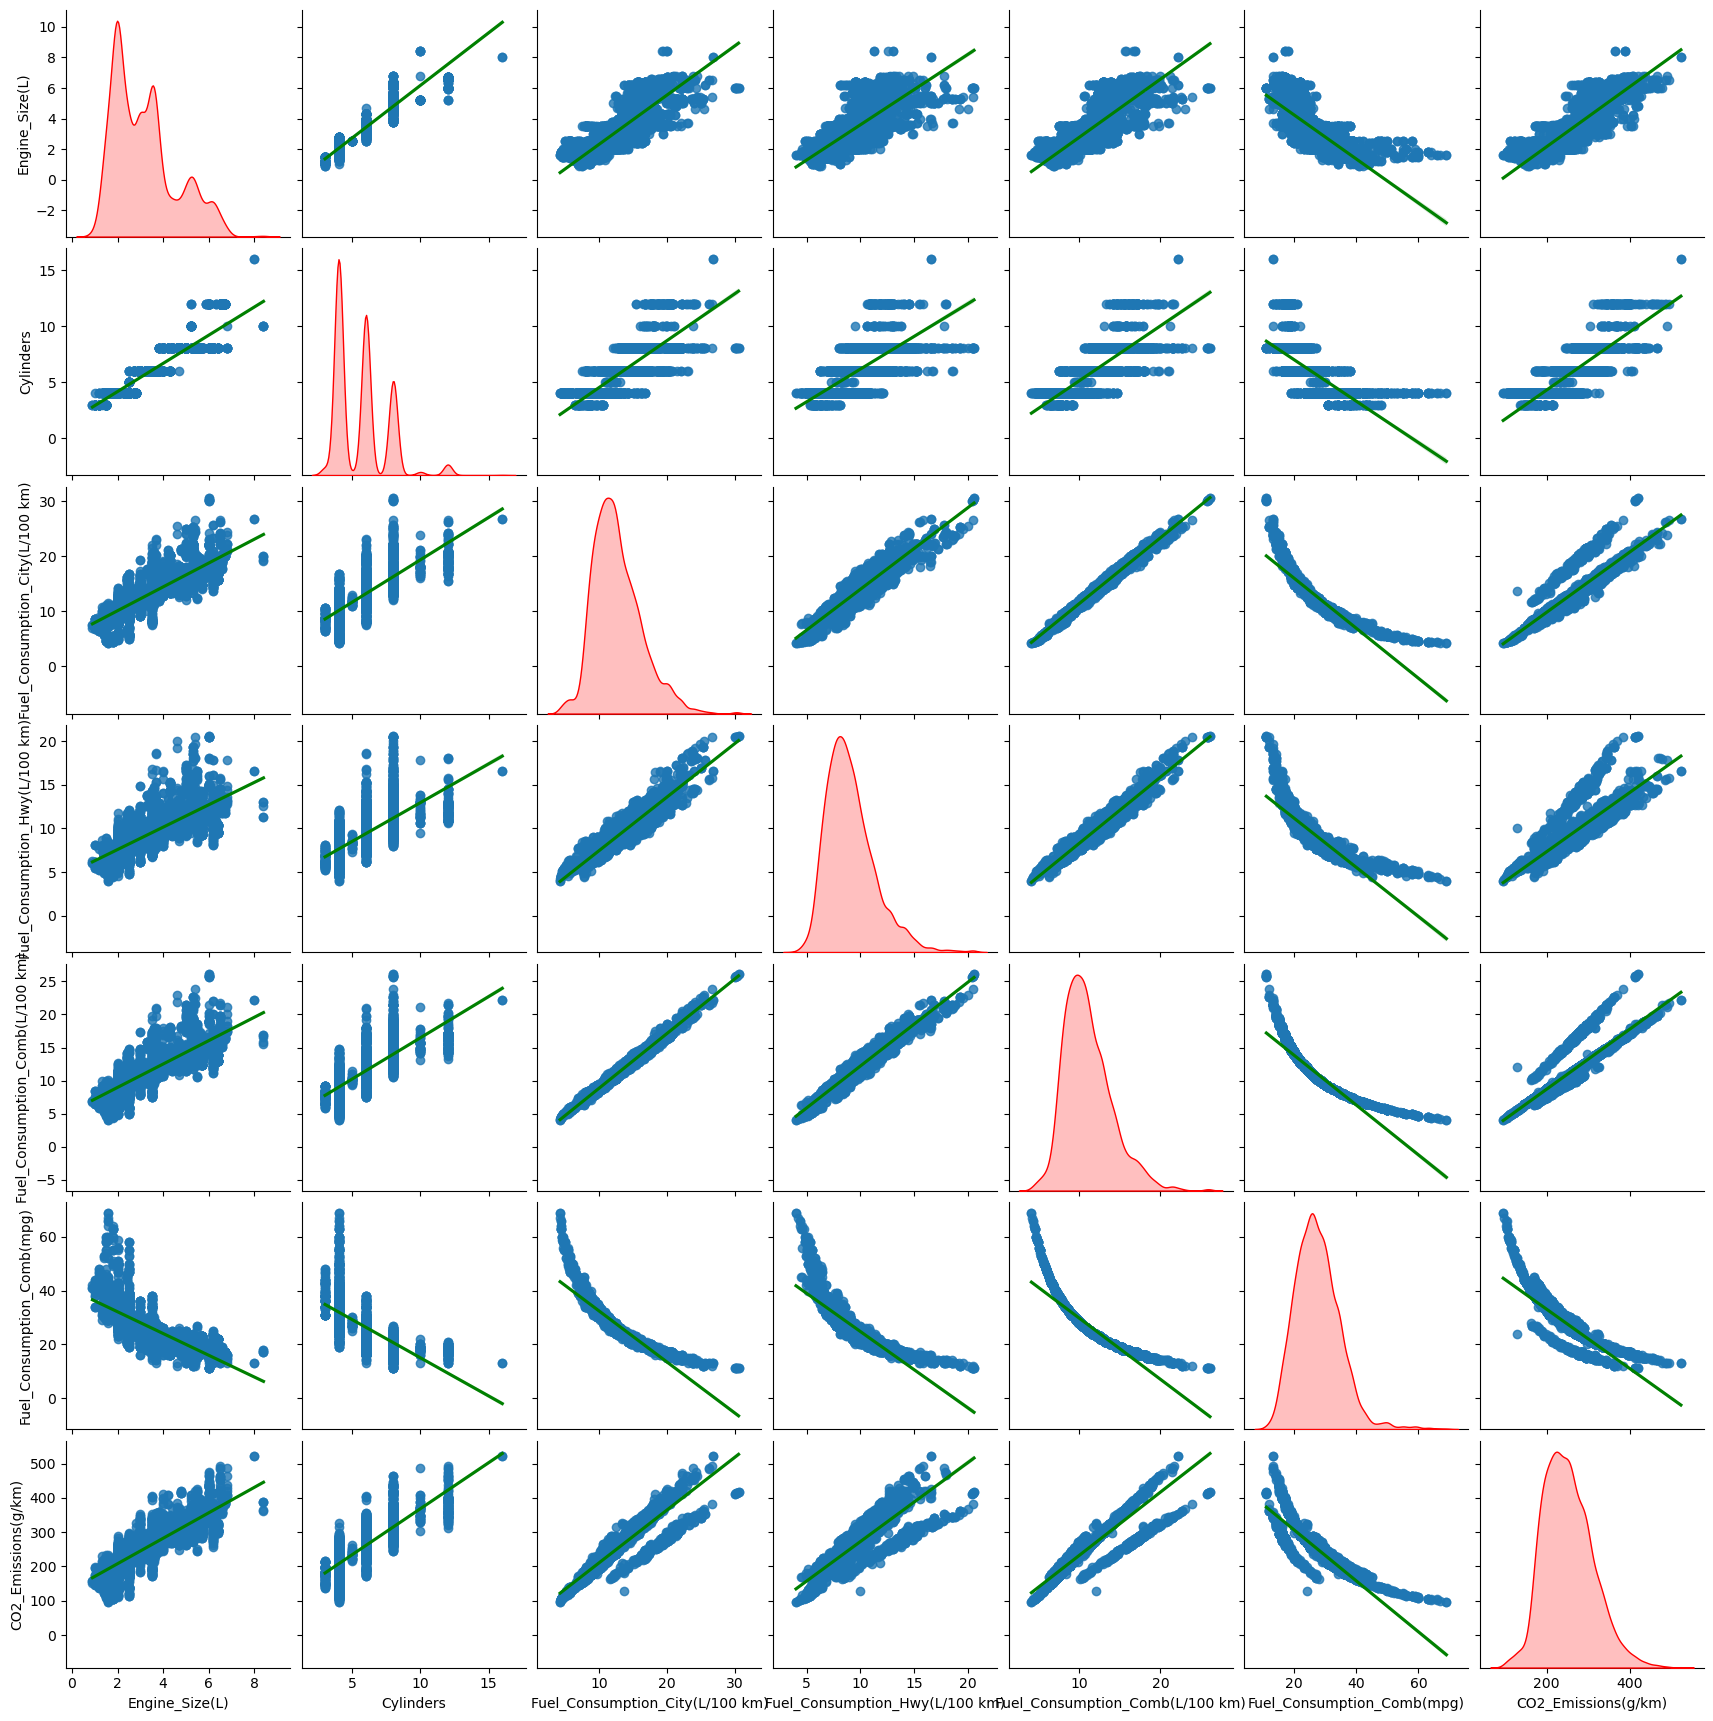

In [17]:
# Change dataset for EDA
df_copy = df.copy()

sns.pairplot(df_copy, kind='reg', diag_kind='kde', diag_kws={'color' : 'red'}, plot_kws={'line_kws':{'color' : 'green'}})

In [18]:
# Assigning the correlated variables to variable_numerical for visuals
variable_numerical =['Engine_Size(L)', 'Cylinders', 
                               'Fuel_Consumption_City(L/100 km)', 
                               'Fuel_Consumption_Hwy(L/100 km)', 
                               'Fuel_Consumption_Comb(L/100 km)', 
                               'CO2_Emissions(g/km)']

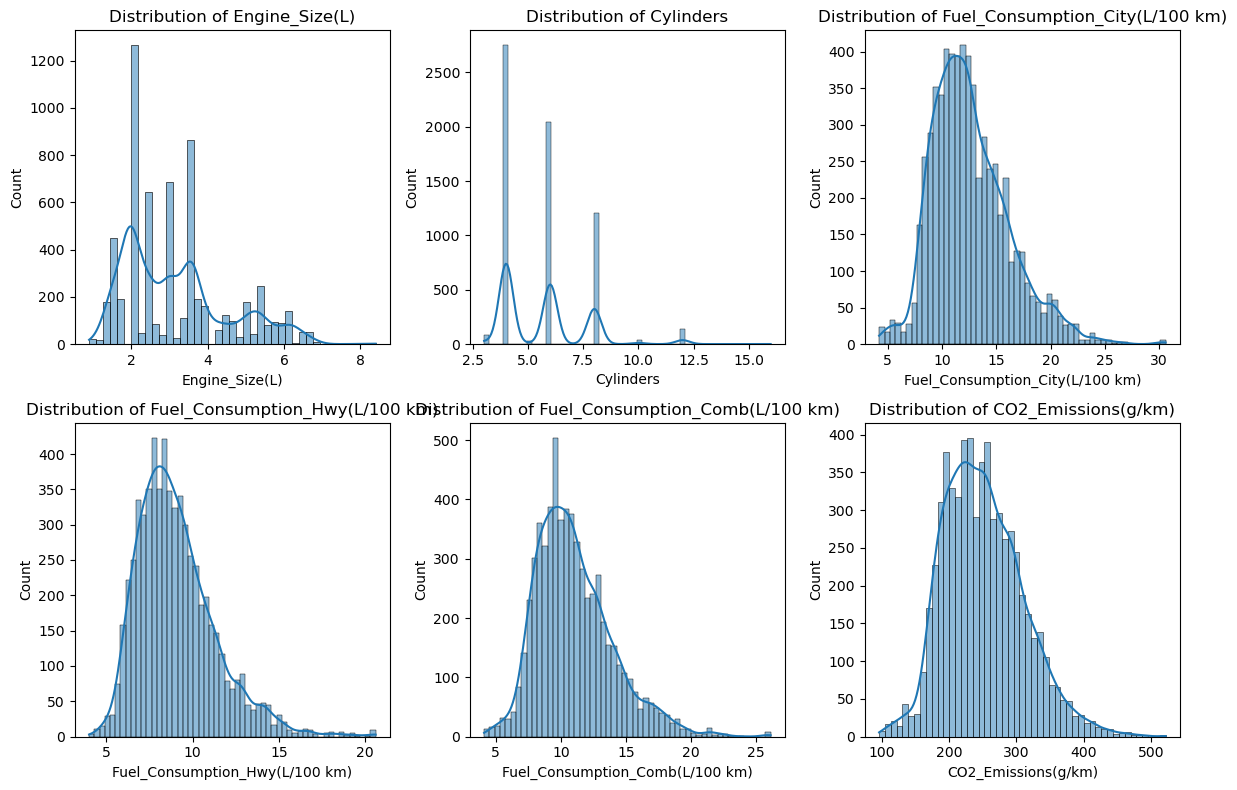

In [19]:
plt.figure(figsize=(12, 8))
for i, var in enumerate(variable_numerical, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df_copy, x=var, kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

#### Average CO2 Emissions by Make

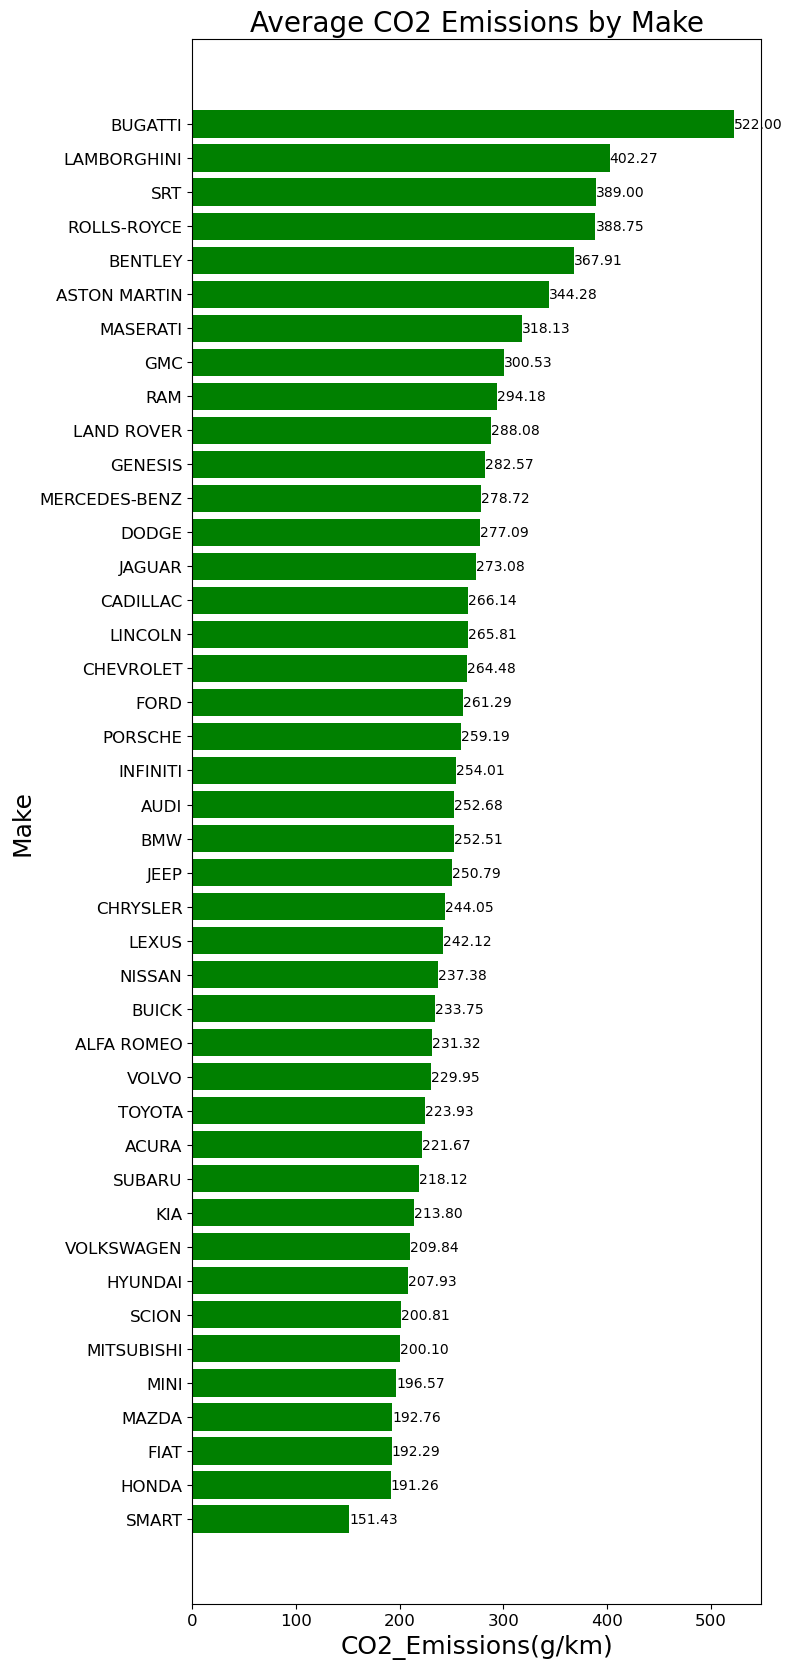

In [20]:
makes = df_copy['Make'].unique()

co2_means = []

# Calculate mean CO2 Emissions for each make
for make in makes:
    co2_means.append(df_copy[df_copy['Make'] == make]['CO2_Emissions(g/km)'].mean())

sorted_makes = np.argsort(co2_means)
makes = makes[sorted_makes]
co2_means = [co2_means[i] for i in sorted_makes]

num_makes = len(makes)
fig_height = max(1, num_makes * 0.4)

plt.figure(figsize=(8, fig_height))
bars = plt.barh(makes, co2_means, color = 'green')
plt.title('Average CO2 Emissions by Make', fontsize = 20)
plt.ylabel('Make', fontsize = 18)
plt.xlabel('CO2_Emissions(g/km)', fontsize = 18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)
    
plt.tight_layout()
plt.show()


#### Average CO2 Emissions by Vehicle Class

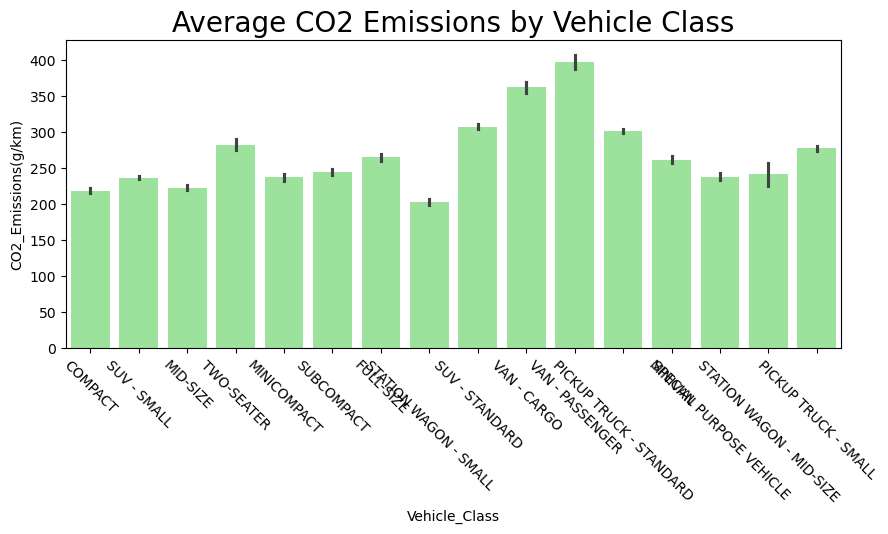

In [21]:
plt.figure(figsize=(10, 4))
sns.barplot(df_copy, x='Vehicle_Class', y='CO2_Emissions(g/km)', color='lightgreen')
plt.title('Average CO2 Emissions by Vehicle Class', fontsize = 20)
plt.xticks(rotation = -45)
plt.show()

#### Engine Size vs CO2 Emissions by Cylinders

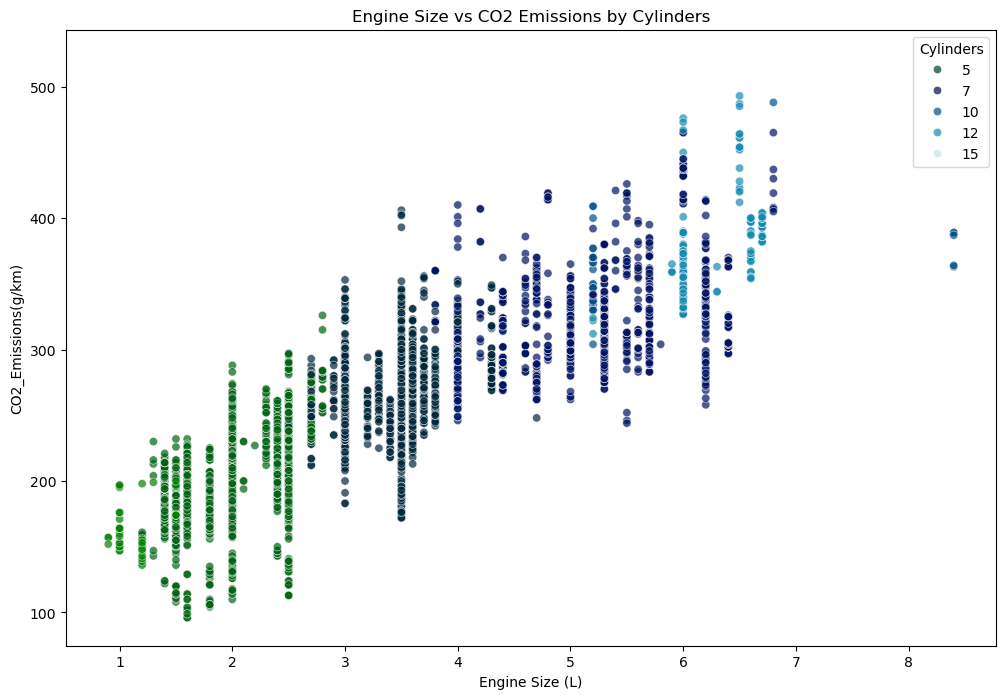

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df_copy, x='Engine_Size(L)', y='CO2_Emissions(g/km)', hue='Cylinders', palette='ocean', alpha = 0.7)
plt.title('Engine Size vs CO2 Emissions by Cylinders')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2_Emissions(g/km)')
plt.show()

#### CO2 Emissions by Fuel Type

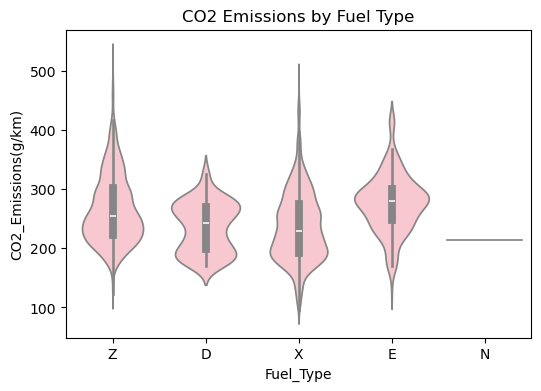

In [23]:
plt.figure(figsize=(6, 4))
sns.violinplot(df_copy, x='Fuel_Type', y='CO2_Emissions(g/km)', color='pink')
plt.title('CO2 Emissions by Fuel Type')
plt.show()

#### Fuel Consumption by Fuel Type

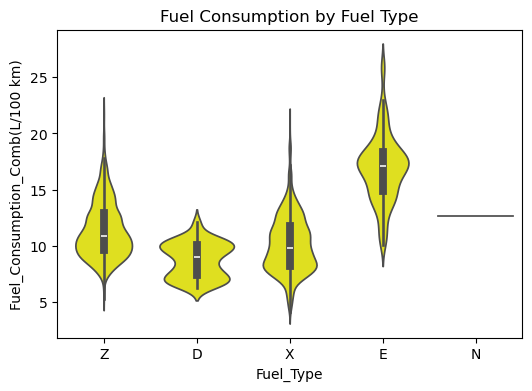

In [24]:
plt.figure(figsize=(6, 4))
sns.violinplot(df_copy, x='Fuel_Type', y='Fuel_Consumption_Comb(L/100 km)', color='yellow')
plt.title('Fuel Consumption by Fuel Type')
plt.show()

#### Outlier from CO2 Emissions

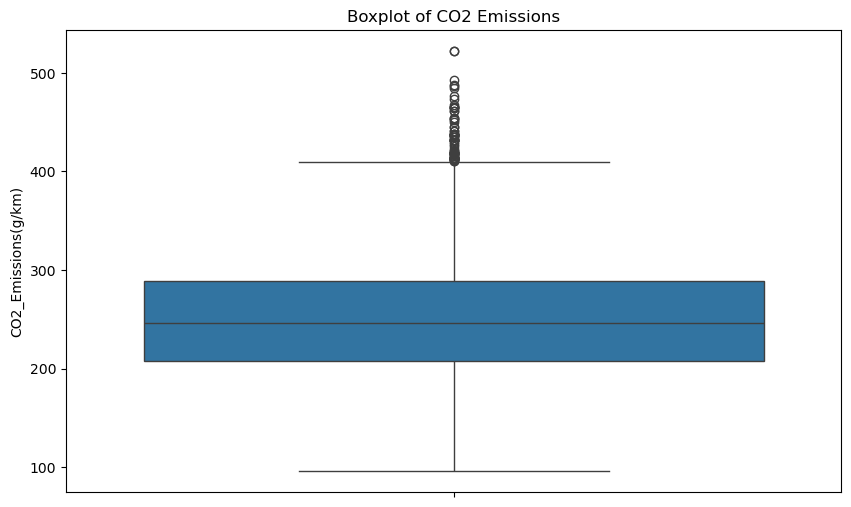

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, y='CO2_Emissions(g/km)')
plt.title('Boxplot of CO2 Emissions')
plt.show()

#### Remove Outliers using Z-Score

In [26]:
def remove_using_zscore(df_copy, columns, threshold=3):
    z_scores = stats.zscore(df_copy[columns])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    df_copy_cleaned = df_copy[filtered_entries]
    return df_copy_cleaned

col_outlier_removal = [
    'Engine_Size(L)', 'Cylinders', 
    'Fuel_Consumption_City(L/100 km)', 
    'Fuel_Consumption_Hwy(L/100 km)', 
    'Fuel_Consumption_Comb(L/100 km)', 
    'CO2_Emissions(g/km)'
]

df_copy_cleaned = remove_using_zscore(df_copy, col_outlier_removal)


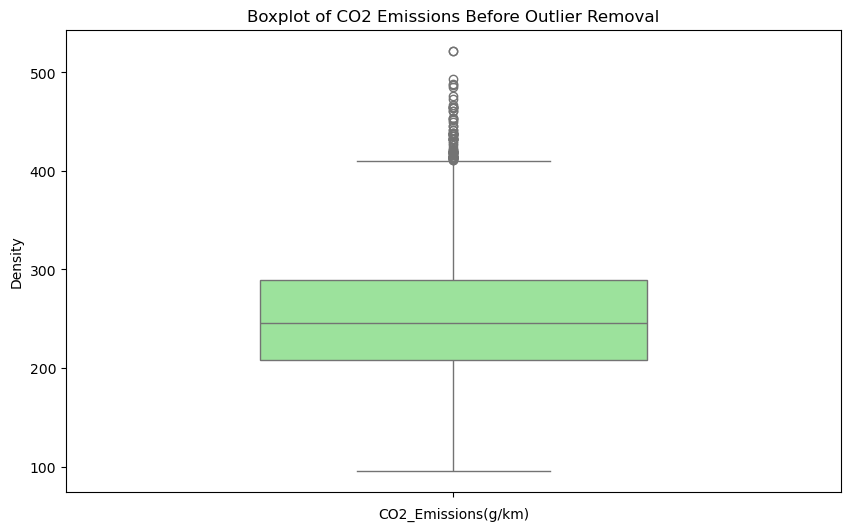

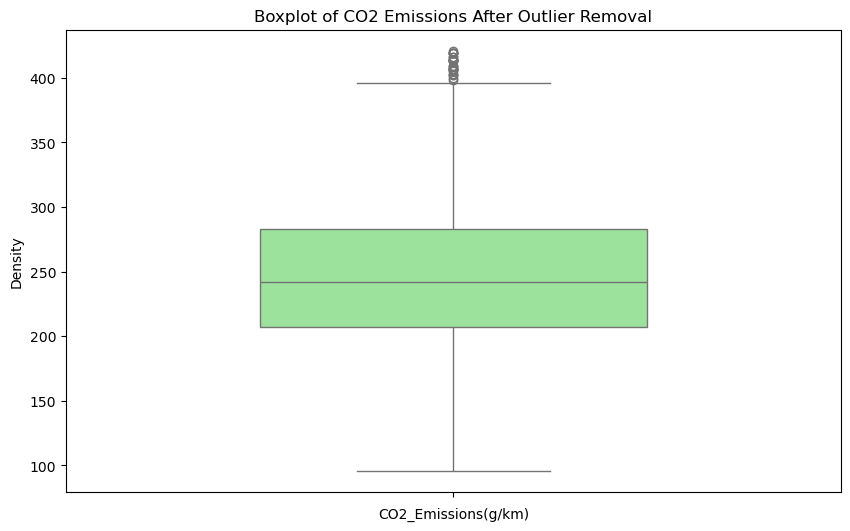

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy['CO2_Emissions(g/km)'], color='lightgreen', width=0.5)
plt.title('Boxplot of CO2 Emissions Before Outlier Removal')
plt.xlabel('CO2_Emissions(g/km)')
plt.ylabel('Density')
plt.show()
 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy_cleaned['CO2_Emissions(g/km)'], color='lightgreen', width=0.5)
plt.title('Boxplot of CO2 Emissions After Outlier Removal')
plt.xlabel('CO2_Emissions(g/km)')
plt.ylabel('Density')
plt.show()

The median engine size is: 3.0 liters


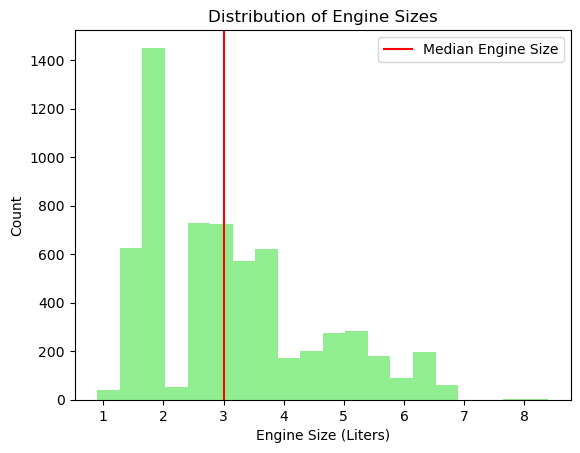

In [28]:
# Calculate the median engine size
median_engine_size = df_copy_cleaned['Engine_Size(L)'].median()

# Print the result
print('The median engine size is:', median_engine_size, 'liters')

# Create a histogram of engine sizes to visualize the distribution
plt.hist(df_copy['Engine_Size(L)'], bins=20, color='lightgreen')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Count')
plt.title('Distribution of Engine Sizes')
plt.axvline(x=median_engine_size, color='red', label='Median Engine Size')
plt.legend()
plt.show()

Average fuel consumption for regular gasoline (X) is: 10.06 L/100 km
Average fuel consumption for premium gasoline (Z) is: 11.11 L/100 km
Average fuel consumption for ethanol (E) is: 16.0 L/100 km
Average fuel consumption for diesel (D) is: 8.75 L/100 km


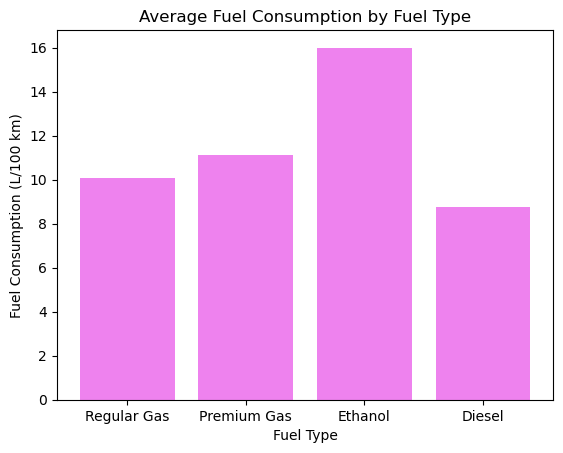

In [29]:
# Filter the fuel types
regular_gas = df_copy_cleaned[df_copy_cleaned['Fuel_Type'] == 'X']['Fuel_Consumption_Comb(L/100 km)']
premium_gas = df_copy_cleaned[df_copy_cleaned['Fuel_Type'] == 'Z']['Fuel_Consumption_Comb(L/100 km)']
ethanol = df_copy_cleaned[df_copy_cleaned['Fuel_Type'] == 'E']['Fuel_Consumption_Comb(L/100 km)']
diesel = df_copy_cleaned[df_copy_cleaned['Fuel_Type'] == 'D']['Fuel_Consumption_Comb(L/100 km)']

# Calculate Mean each fuel types
mean_regular_gas = round(regular_gas.mean(), 2)
mean_premium_gas = round(premium_gas.mean(), 2)
mean_ethanol = round(ethanol.mean(), 2)
mean_diesel = round(diesel.mean(), 2)

# Print the results for each fuel type
print('Average fuel consumption for regular gasoline (X) is:', mean_regular_gas, 'L/100 km' )
print('Average fuel consumption for premium gasoline (Z) is:', mean_premium_gas, 'L/100 km')
print('Average fuel consumption for ethanol (E) is:', mean_ethanol, 'L/100 km')
print('Average fuel consumption for diesel (D) is:', mean_diesel, 'L/100 km')

# Create a bar chart of the mean fuel consumption for each fuel type
labels = ['Regular Gas', 'Premium Gas', 'Ethanol', 'Diesel']
values = [mean_regular_gas, mean_premium_gas, mean_ethanol, mean_diesel]

plt.bar(labels, values, color = 'violet')
plt.title('Average Fuel Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.show()

## Feauture Engineering

#### Seperate Numerical and Categorical Values

In [30]:
numerical_col = df_copy_cleaned.select_dtypes(include=np.number).columns.tolist()
categorical_col = df_copy_cleaned.select_dtypes(include=['object']).columns

print('Numerical Variables: ')
print(numerical_col)

print()
print()

print('Categorical Variables: ')
print(categorical_col)


Numerical Variables: 
['Engine_Size(L)', 'Cylinders', 'Fuel_Consumption_City(L/100 km)', 'Fuel_Consumption_Hwy(L/100 km)', 'Fuel_Consumption_Comb(L/100 km)', 'Fuel_Consumption_Comb(mpg)', 'CO2_Emissions(g/km)']


Categorical Variables: 
Index(['Make', 'Model', 'Vehicle_Class', 'Transmission', 'Fuel_Type'], dtype='object')


#### One Hot Encoding

In [31]:
dataset = df_copy_cleaned.copy()
dataset.drop(['Make', 'Model', 'Vehicle_Class', 'Transmission'], inplace=True, axis=1)
dataset.head()

,Engine_Size(L),Cylinders,Fuel_Type,Fuel_Consumption_City(L/100 km),Fuel_Consumption_Hwy(L/100 km),Fuel_Consumption_Comb(L/100 km),Fuel_Consumption_Comb(mpg),CO2_Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244


In [32]:
# Filter rows where the Fuel_Type is 'N'
dataset_N = dataset[dataset['Fuel_Type'] == 'N']

# Get the indices of the filtered rows
indexs = dataset_N.index

# Display the new DataFrame df_N
print(dataset_N)

      Engine_Size(L)  Cylinders Fuel_Type  Fuel_Consumption_City(L/100 km)  \
2439             3.6          6         N                             15.2   

      Fuel_Consumption_Hwy(L/100 km)  Fuel_Consumption_Comb(L/100 km)  \
2439                             9.5                             12.7   

      Fuel_Consumption_Comb(mpg)  CO2_Emissions(g/km)  
2439                          22                  213  


In [33]:
# Drop rows when fuel type is N
dataset = dataset[dataset['Fuel_Type'] != 'N']

print(dataset)

      Engine_Size(L)  Cylinders Fuel_Type  Fuel_Consumption_City(L/100 km)  \
0                2.0          4         Z                              9.9   
1                2.4          4         Z                             11.2   
2                1.5          4         Z                              6.0   
3                3.5          6         Z                             12.7   
4                3.5          6         Z                             12.1   
...              ...        ...       ...                              ...   
7380             2.0          4         Z                             10.7   
7381             2.0          4         Z                             11.2   
7382             2.0          4         Z                             11.7   
7383             2.0          4         Z                             11.2   
7384             2.0          4         Z                             12.2   

      Fuel_Consumption_Hwy(L/100 km)  Fuel_Consumption_Comb(L/1

#### One Hot Encoding on the 'Fuel_Type' column 

In [34]:
c

    Fuel_Type_E  Fuel_Type_X  Fuel_Type_Z
0         False        False         True
1         False        False         True
2         False        False         True
3         False        False         True
4         False        False         True
5         False        False         True
6         False        False         True
7         False        False         True
8         False        False         True
9         False        False         True
10        False        False         True
11        False        False         True
12        False        False         True
15        False        False         True
16        False        False         True


In [35]:
# one-hot encoding on the 'Fuel_Type' column with drop_first=True
fuel_type_dummies = pd.get_dummies(dataset['Fuel_Type'], prefix='Fuel_Type', drop_first=True)

# Concatenate the new columns with the original DataFrame
dataset = pd.concat([dataset, fuel_type_dummies], axis=1)

# Drop the original 'Fuel_Type' column
dataset.drop('Fuel_Type', axis=1, inplace=True)

# Display the modified DataFrame
print(dataset)

      Engine_Size(L)  Cylinders  Fuel_Consumption_City(L/100 km)  \
0                2.0          4                              9.9   
1                2.4          4                             11.2   
2                1.5          4                              6.0   
3                3.5          6                             12.7   
4                3.5          6                             12.1   
...              ...        ...                              ...   
7380             2.0          4                             10.7   
7381             2.0          4                             11.2   
7382             2.0          4                             11.7   
7383             2.0          4                             11.2   
7384             2.0          4                             12.2   

      Fuel_Consumption_Hwy(L/100 km)  Fuel_Consumption_Comb(L/100 km)  \
0                                6.7                              8.5   
1                                7.7 

## Split Dataset

In [36]:
X = dataset.drop('CO2_Emissions(g/km)', axis=1)
Y = dataset['CO2_Emissions(g/km)']

#### Scaler

In [37]:
sc = MinMaxScaler()
sc_X = sc.fit_transform(X)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Modelling

#### Linear Regression

In [39]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

#### Evaluation Model

In [40]:
mae = mean_absolute_error(Y_test, lr_pred)
mse = mean_squared_error(Y_test, lr_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(Y_test, lr_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) coefficient of determination:", r_squared)

Mean Absolute Error (MAE): 2.679926928765762
Mean Squared Error (MSE): 17.192219759900244
Root Mean Squared Error (RMSE): 4.146350173333198
R-squared (R²) coefficient of determination: 0.9940831193923257


#### Using Cross Validation

In [41]:
cv_score = cross_val_score(lr, X, Y, cv=5)
print('Cross Validation Scores: ')
print(cv_score)
print()
print('Mean Cross Validation Scores: ')
print(cv_score.mean())

Cross Validation Scores: 
[0.99162845 0.99050586 0.9934107  0.99525355 0.99630556]

Mean Cross Validation Scores: 
0.9934208257631877


## Combine All Model

Random Forest:
Training R2 Score: 0.96
Training Mean Absolute Error (MAE): 6.72
Training Mean Square Error (MSE): 103.47
Training Root Mean Squared Error (RMSE): 10.17
-----------------------------------
Test R2 Score: 0.96
Test Mean Absolute Error (MAE): 6.84
Test Mean Square Error (MSE): 117.49
Test Root Mean Squared Error (RMSE): 10.84
   Actual CO2 Emissions  Predicted CO2 Emissions
0                   214               210.541072
1                   145               150.483123
2                   284               279.575203
3                   207               206.279584
4                   278               285.523692
------------------------------------------------------


Linear Regression:
Training R2 Score: 0.99
Training Mean Absolute Error (MAE): 2.64
Training Mean Square Error (MSE): 16.13
Training Root Mean Squared Error (RMSE): 4.02
-----------------------------------
Test R2 Score: 0.99
Test Mean Absolute Error (MAE): 2.68
Test Mean Square Error (MSE): 17.19
Test Root Mean Squared Error (RMSE): 4.15
   Actual CO2 Emissions  Predicted CO2 Emissions
0                   214               214.316719
1                   145               145.885005
2                   284               279.098215
3                   207               205.859038
4                   278               281.657131
------------------------------------------------------
Linear SVM:
Training R2 Score: 0.86
Training Mean Absolute Error (MAE): 8.13
Training Mean Square Error (MSE): 418.27
Training Root Mean Squared Error (RMSE): 20.45
-----------------------------------
Test R2 Score: 0.85
Test Mean Absolute Error (MAE): 8.31
Test Mean Square Error (MSE): 431.33
Test Root Mean 

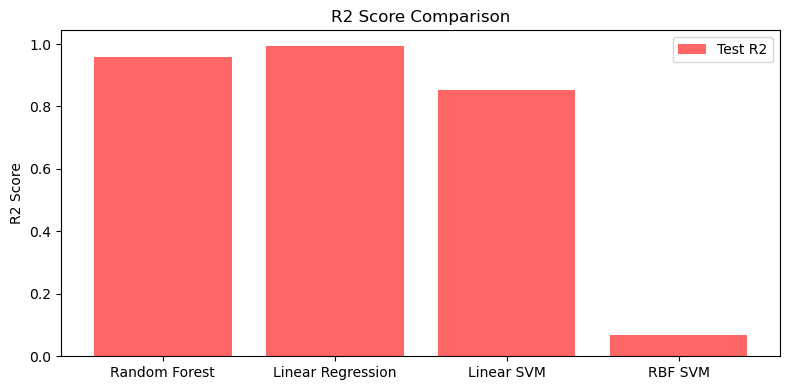

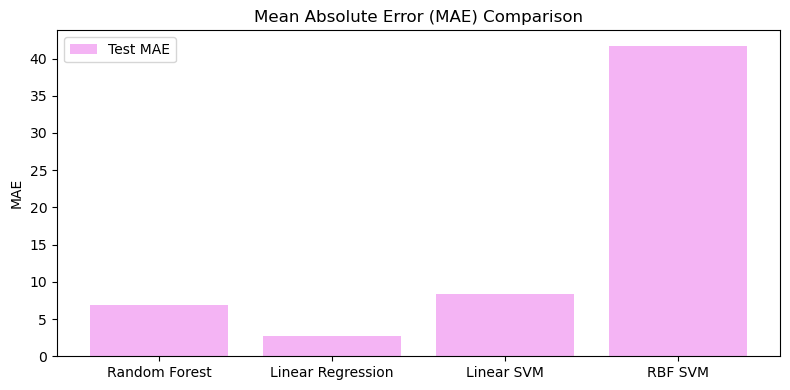

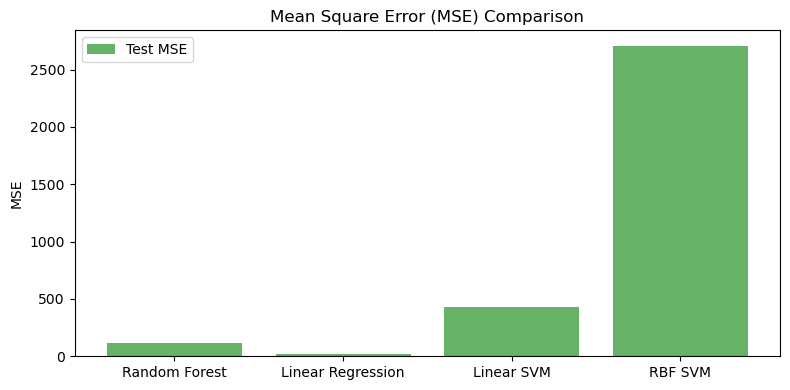

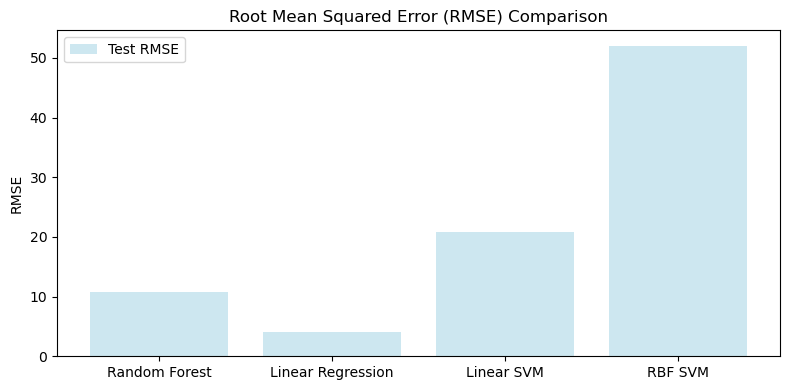

In [42]:
model_names = [
    'Random Forest',
    'Linear Regression',
    'Linear SVM', 
    'RBF SVM',
]

regressors = [
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    LinearRegression(),
    SVR(kernel="linear", C=0.005),
    SVR(kernel="rbf", C=0.005, gamma='scale'),
]

results = {
    'Model': [],
    'Train R2': [],
    'Train MAE': [],
    'Train MSE' : [],
    'Train RMSE': [],
    'Test R2': [],
    'Test MAE': [],
    'Test MSE' : [],
    'Test RMSE': [],
}

best_model = None
best_r2 = 0

for name, regressor in zip(model_names, regressors):
    # Fit Model with training data
    regressor.fit(X_train, Y_train)
    
    # Make Predictions on training data
    Y_train_pred = regressor.predict(X_train)
    train_r2 = r2_score(Y_train, Y_train_pred)
    train_mae = mean_absolute_error(Y_train, Y_train_pred)
    train_mse = mean_squared_error(Y_train, Y_train_pred)
    train_rmse = mean_squared_error(Y_train, Y_train_pred, squared=False)

    # Make Predictions on test data
    Y_test_pred = regressor.predict(X_test)
    test_r2 = r2_score(Y_test, Y_test_pred)
    test_mae = mean_absolute_error(Y_test, Y_test_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    test_rmse = mean_squared_error(Y_test, Y_test_pred, squared=False)

    # Dataframe for comparison
    submit = pd.DataFrame({'Actual CO2 Emissions': Y_test, 'Predicted CO2 Emissions': Y_test_pred})
    submit = submit.reset_index(drop=True)

    # Store results
    results['Model'].append(name)
    results['Train R2'].append(train_r2)
    results['Train MAE'].append(train_mae)
    results['Train MSE'].append(train_mse)
    results['Train RMSE'].append(train_rmse)
    results['Test R2'].append(test_r2)
    results['Test MAE'].append(test_mae)
    results['Test MSE'].append(test_mse)
    results['Test RMSE'].append(test_rmse)

    # Check the best model
    if test_r2 > best_r2:
        best_r2 = test_r2
        best_model = name

    print(f'{name}:')
    print(f'Training R2 Score: {train_r2:.2f}')
    print(f'Training Mean Absolute Error (MAE): {train_mae:.2f}')
    print(f'Training Mean Square Error (MSE): {train_mse:.2f}')
    print(f'Training Root Mean Squared Error (RMSE): {train_rmse:.2f}')
    print('-----------------------------------')
    print(f'Test R2 Score: {test_r2:.2f}')
    print(f'Test Mean Absolute Error (MAE): {test_mae:.2f}')
    print(f'Test Mean Square Error (MSE): {test_mse:.2f}')
    print(f'Test Root Mean Squared Error (RMSE): {test_rmse:.2f}')
    print(submit.head(5))
    print('------------------------------------------------------')

# Show the best performing model and its accuracy
print(f"The best performing model is: {best_model} with R2 score: {best_r2:.2f}")


# Create a dataframe from results
results_df = pd.DataFrame(results)

# Plot the results

# R2 Score Plot
plt.figure(figsize=(8, 4))
plt.bar(results_df['Model'], results_df['Test R2'], color='red', alpha=0.6, label='Test R2')
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.legend()
plt.tight_layout()
plt.show()

# MAE Plot
plt.figure(figsize=(8, 4))
plt.bar(results_df['Model'], results_df['Test MAE'], color='violet', alpha=0.6, label='Test MAE')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

# MSE Plot
plt.figure(figsize=(8, 4))
plt.bar(results_df['Model'], results_df['Test MSE'], color='green', alpha=0.6, label='Test MSE')
plt.title('Mean Square Error (MSE) Comparison')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.show()

# RMSE Plot
plt.figure(figsize=(8, 4))
plt.bar(results_df['Model'], results_df['Test RMSE'], color='lightblue', alpha=0.6, label='Test RMSE')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.show()